# **Tugas 1: Multiple Linear Regression**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv('data/insurance.csv')

### 1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [10]:
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

X = data[['smoker', 'age', 'bmi']]
y = data[['charges']]

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### 2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran data latih (X_train)   :", X_train.shape)
print("Ukuran data uji (X_test)      :", X_test.shape)
print("Ukuran target latih (y_train) :", y_train.shape)
print("Ukuran target uji (y_test)    :", y_test.shape)

Ukuran data latih (X_train)   : (1070, 3)
Ukuran data uji (X_test)      : (268, 3)
Ukuran target latih (y_train) : (1070, 1)
Ukuran target uji (y_test)    : (268, 1)


### 3. Lakukan feature scaling jika diperlukan.

In [12]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [13]:
model = LinearRegression()

### 5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [14]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### 6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [15]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R-squared            :', r2)
print('Mean Squared Error   :', mse)
print('Mean Absolute Error  :', mae)

R-squared            : 0.7776932310583375
Mean Squared Error   : 34512843.880227886
Mean Absolute Error  : 4260.560091099389


## **Visualisasi Data**

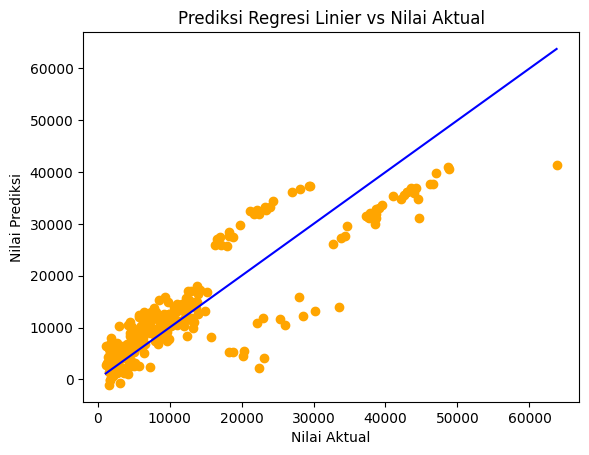

In [16]:
plt.scatter(y_test, y_pred, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b', linestyle='-')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Prediksi Regresi Linier vs Nilai Aktual')
plt.show()